In [12]:
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [13]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from Methods import load_images, plot_sample_images, plot_model_metrics, plot_images_with_predictions, plot_confusion_matrix, plot_mismatched_images

### Model with noise updated
This is our final iteration of our model, using images in full context. Meaning the images contain the in-game background, directional lighting and might contain other objects from our 5 classes in the image.

By providing the model with more information and more complex images, the goal is to make it less likely to be biased, and better at accurately predicting the images gathered from live play.

This model uses updated images, where we have removed outliers that caused the previous model issues.

In [14]:
image_dir = os.path.dirname(os.getcwd())+"\\Screenshots\\InContext\\"
data = load_images(image_dir)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     1440 non-null   int64 
 1   filename  1440 non-null   object
 2   label     1440 non-null   object
 3   img       1440 non-null   object
dtypes: int64(1), object(3)
memory usage: 45.1+ KB


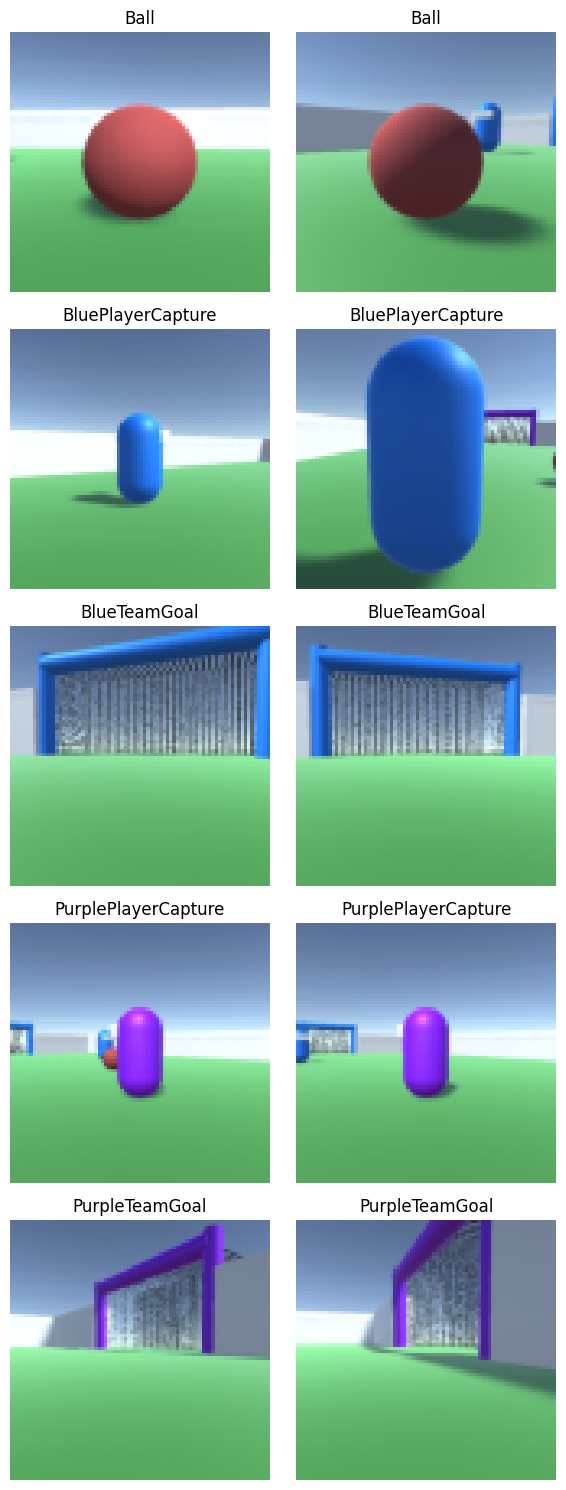

In [15]:
plot_sample_images(data)

In [16]:
#Splitting the data into training and testing
train_df, test_df = train_test_split(data, test_size=0.3)

# Datagen for training data. Augment the data by rotating, shifting, flipping, to make the model more robust and less prone to overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_dataframe(dataframe = train_df,
    directory=image_dir,
    target_size=(64, 64),
    x_col='filename',
    y_col='label',
    batch_size=64,
    class_mode='categorical'
)



Found 1008 validated image filenames belonging to 5 classes.


In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(64, 64),
    batch_size=64,
    class_mode= "categorical",
    shuffle=False
)

Found 432 validated image filenames belonging to 5 classes.


Initial model -  based on the last model in model with noise.

default learning rate (0.001)

In [18]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    # Add more layers as needed
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
trained_model_initial = model.fit(train_generator,validation_data = test_generator, epochs=30)

C:\Users\Søren Merved\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


C:\Users\Søren Merved\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.2350 - loss: 2.1762 - val_accuracy: 0.4861 - val_loss: 1.1571
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.6099 - loss: 1.0524 - val_accuracy: 0.9421 - val_loss: 0.3412
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.8639 - loss: 0.4432 - val_accuracy: 0.9097 - val_loss: 0.2041
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.9353 - loss: 0.2277 - val_accuracy: 0.9259 - val_loss: 0.2240
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9792 - loss: 0.1085 - val_accuracy: 0.9699 - val_loss: 0.0744
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9726 - loss: 0.0947 - val_accuracy: 0.9815 - val_loss: 0.0450
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9807 - loss: 0.0704 - val_accuracy: 0.9676 - val_loss: 0.0610
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.9874 - loss: 0.0527 - val_accuracy: 0.9977 - val_

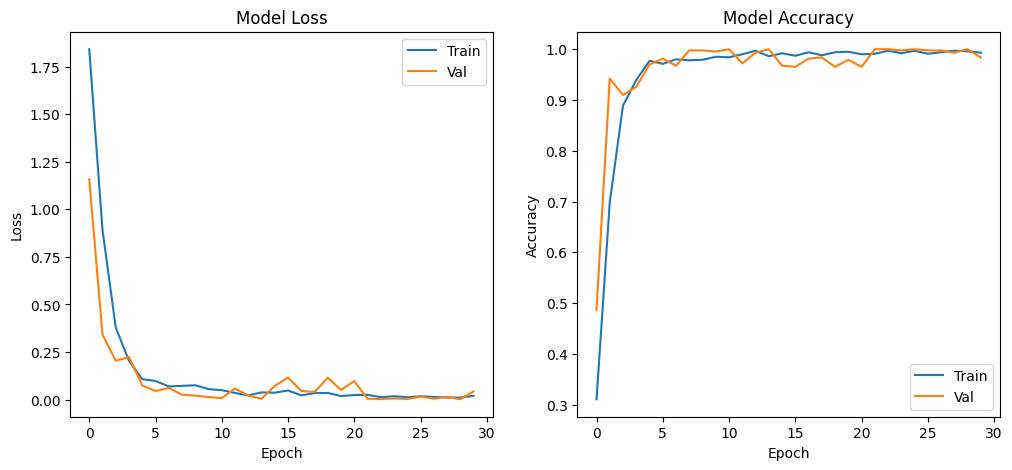

In [19]:
plot_model_metrics(trained_model_initial)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
[[89  0  0  0  0]
 [ 0 88  2  0  0]
 [ 0  0 72  0  3]
 [ 0  0  0 79  2]
 [ 0  0  0  0 97]]


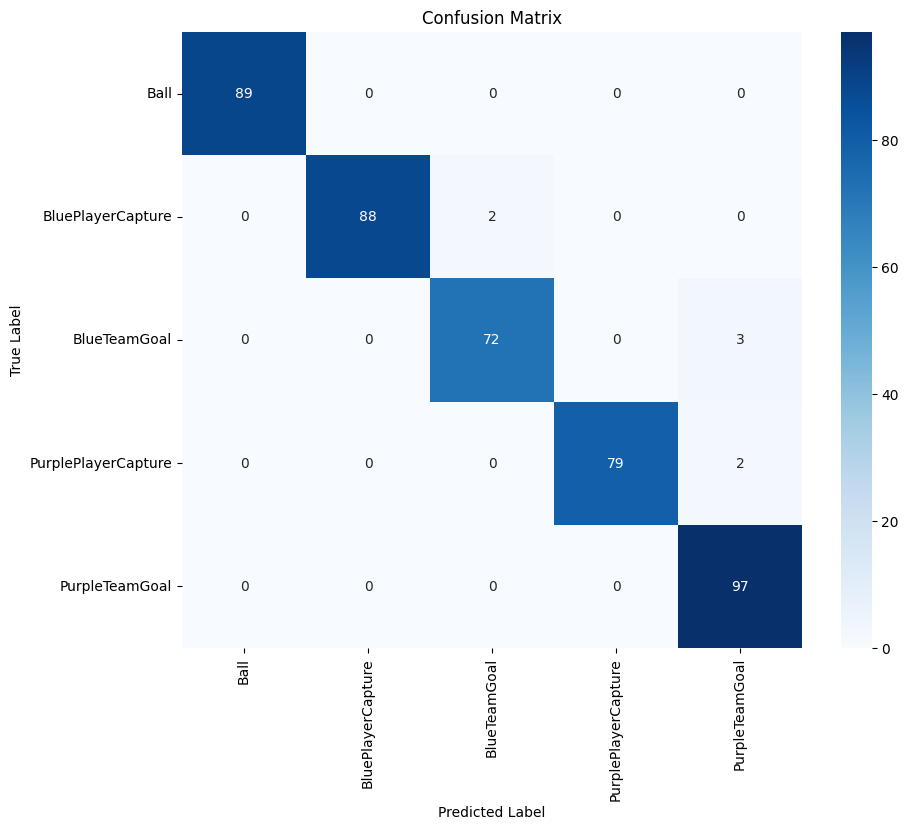

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


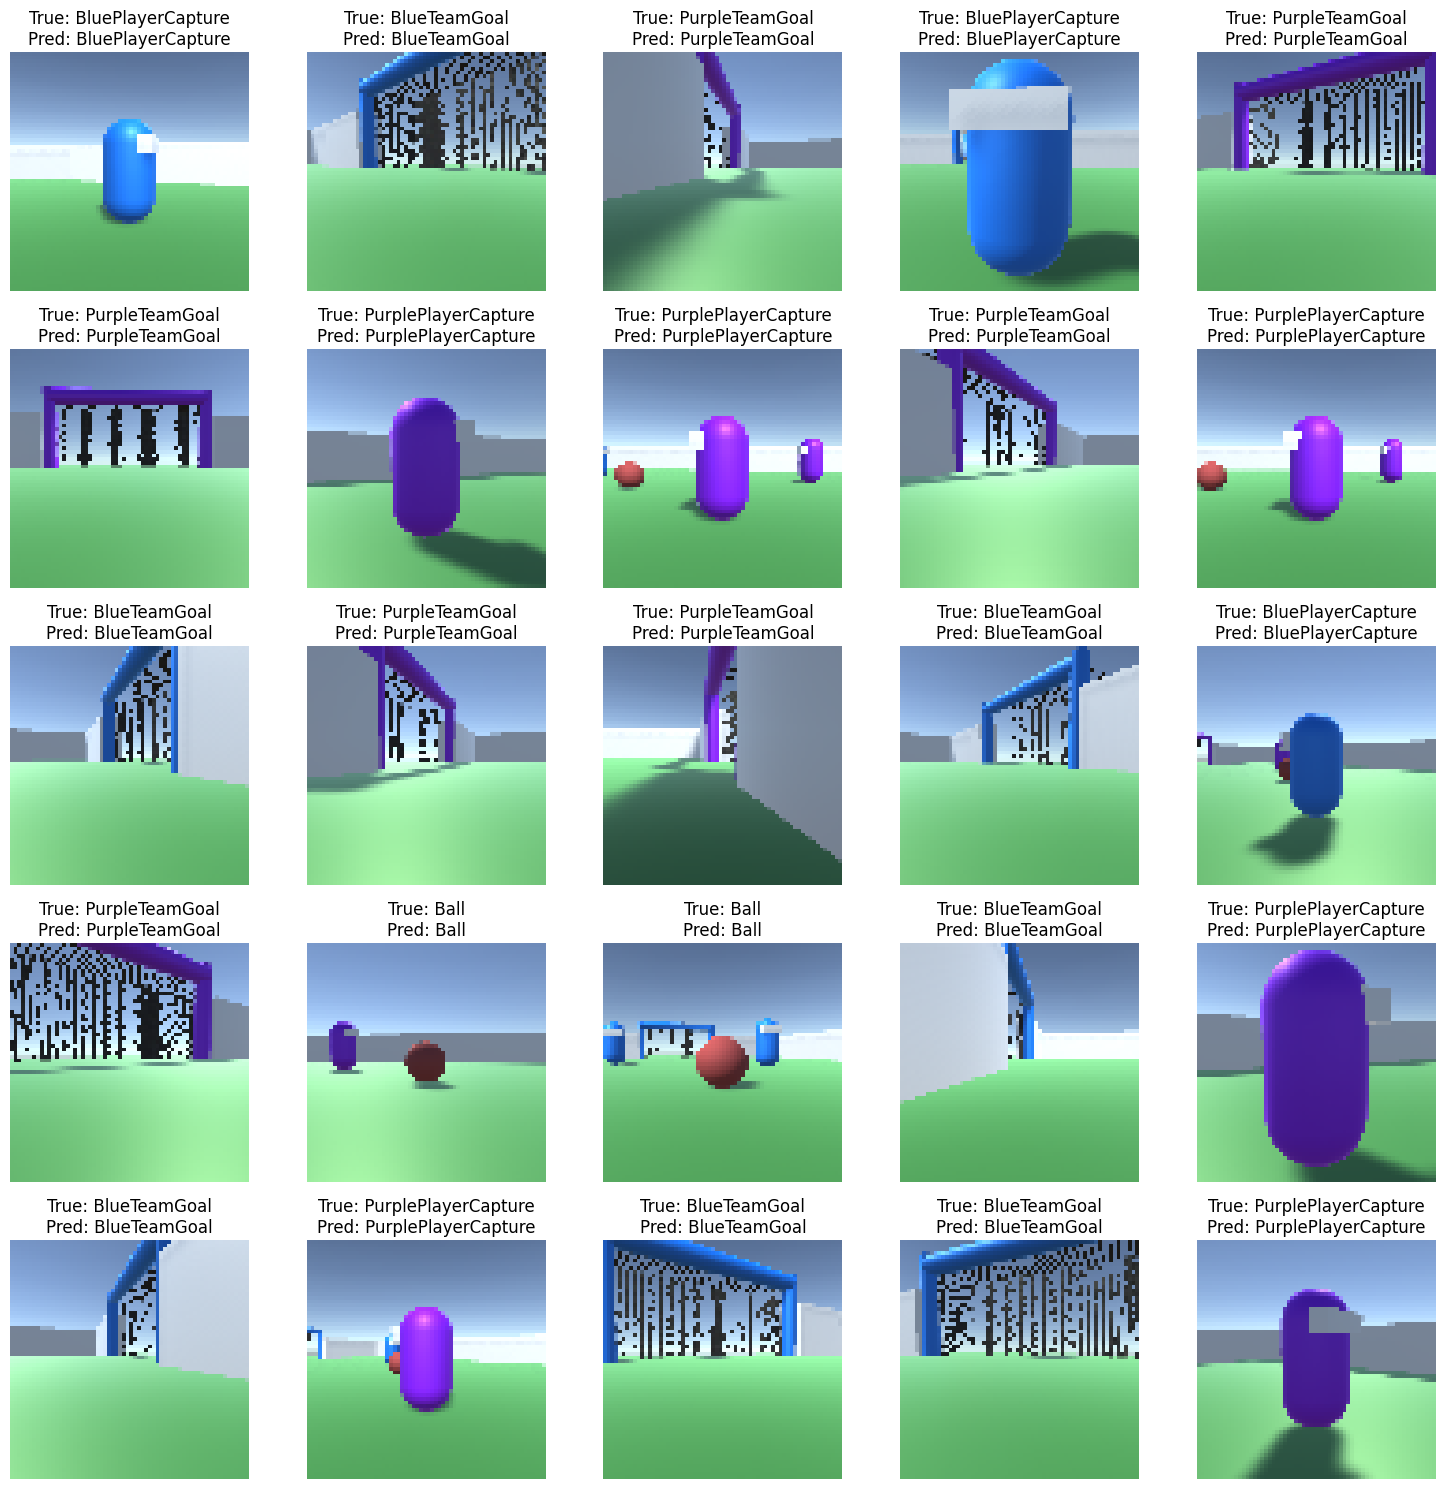

In [20]:
test_labels = test_generator.classes

# Predict the probabilities on the test data
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_classes)

print(cm)

# Plot the confusion matrix
plot_confusion_matrix(cm, test_generator)

# Plotting a batch of images with their true and predicted labels
plot_images_with_predictions(test_generator, model)

### Reducing learning rate

From our initial training we see the model converging almost immediately, which might lead to poor generalization. The model also shows clear signs of overfitting, by for example the big disparity between the validation and training accuracy/loss.

By lowering the learning rate, the updates to the model's parameters will be smaller and more controlled, which might help to mitigate overfitting and stabilize the training.

In [21]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    # Add more layers as needed
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
trained_model_reduced_lr = model.fit(train_generator,validation_data = test_generator, epochs=30)

C:\Users\Søren Merved\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.2842 - loss: 1.5931 - val_accuracy: 0.5880 - val_loss: 1.3994
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.5369 - loss: 1.3905 - val_accuracy: 0.6250 - val_loss: 1.0706
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.5873 - loss: 1.1641 - val_accuracy: 0.7431 - val_loss: 0.7823
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.7261 - loss: 0.9048 - val_accuracy: 0.7662 - val_loss: 0.6176
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.7600 - loss: 0.7503 - val_accuracy: 0.9421 - val_loss: 0.4430
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.8509 - loss: 0.5932 - val_accuracy: 0.9491 - val_loss: 0.3041
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9023 - loss: 0.4535 - val_accuracy: 0.9745 - val_loss: 0.2326
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9120 - loss: 0.3630 - val_accuracy: 0.

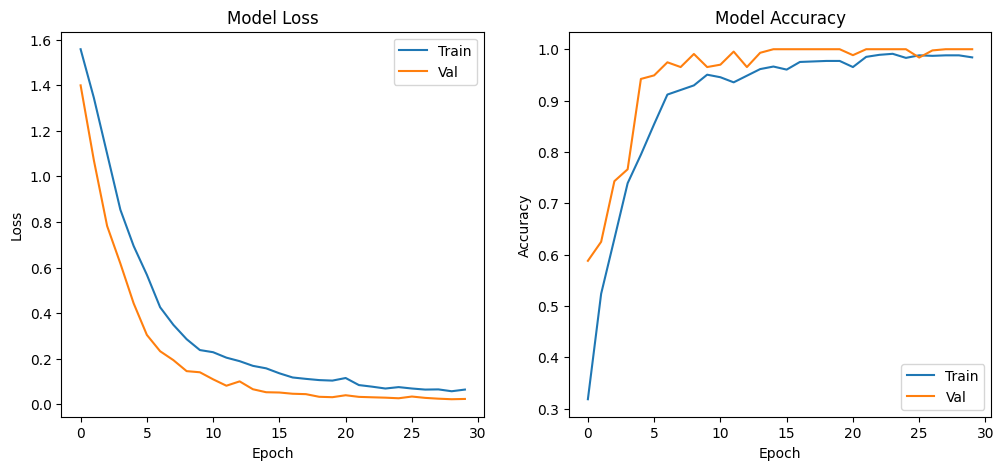

In [22]:
plot_model_metrics(trained_model_reduced_lr)

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/stepWARNING:tensorflow:5 out of the last 16 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000026EB1A30670> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
[[89  0  0  0  0]
 [ 0 90  0  0  0]
 [ 0  0 75  0  0]
 [ 0  0  0 81  0]
 [ 0  0  0  0 97]]


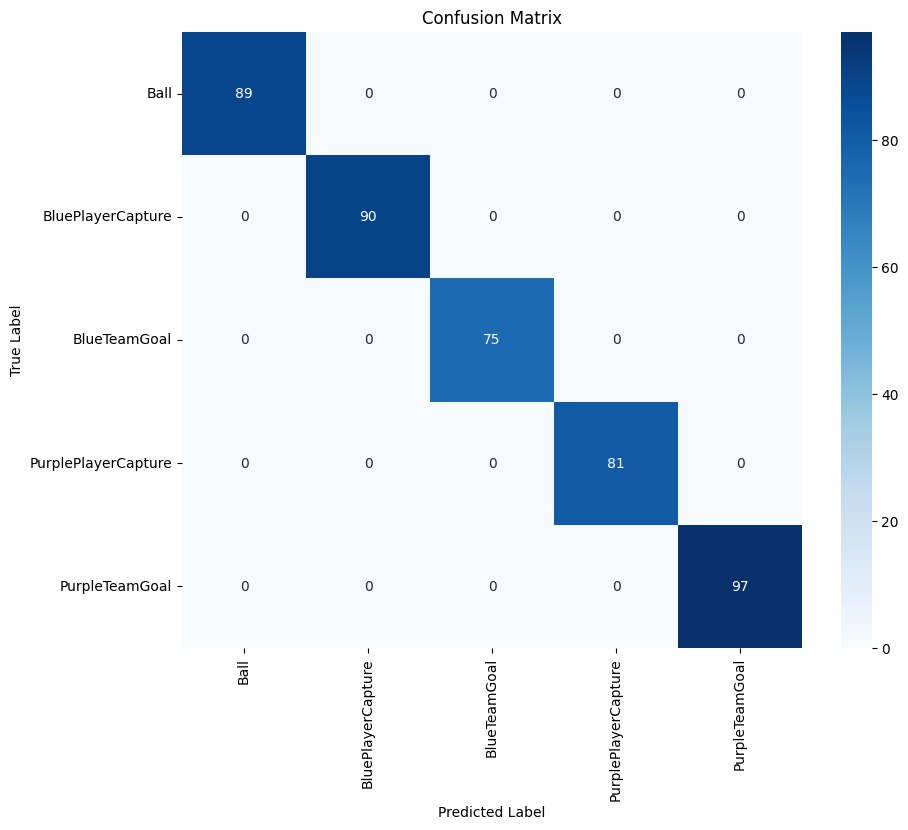

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


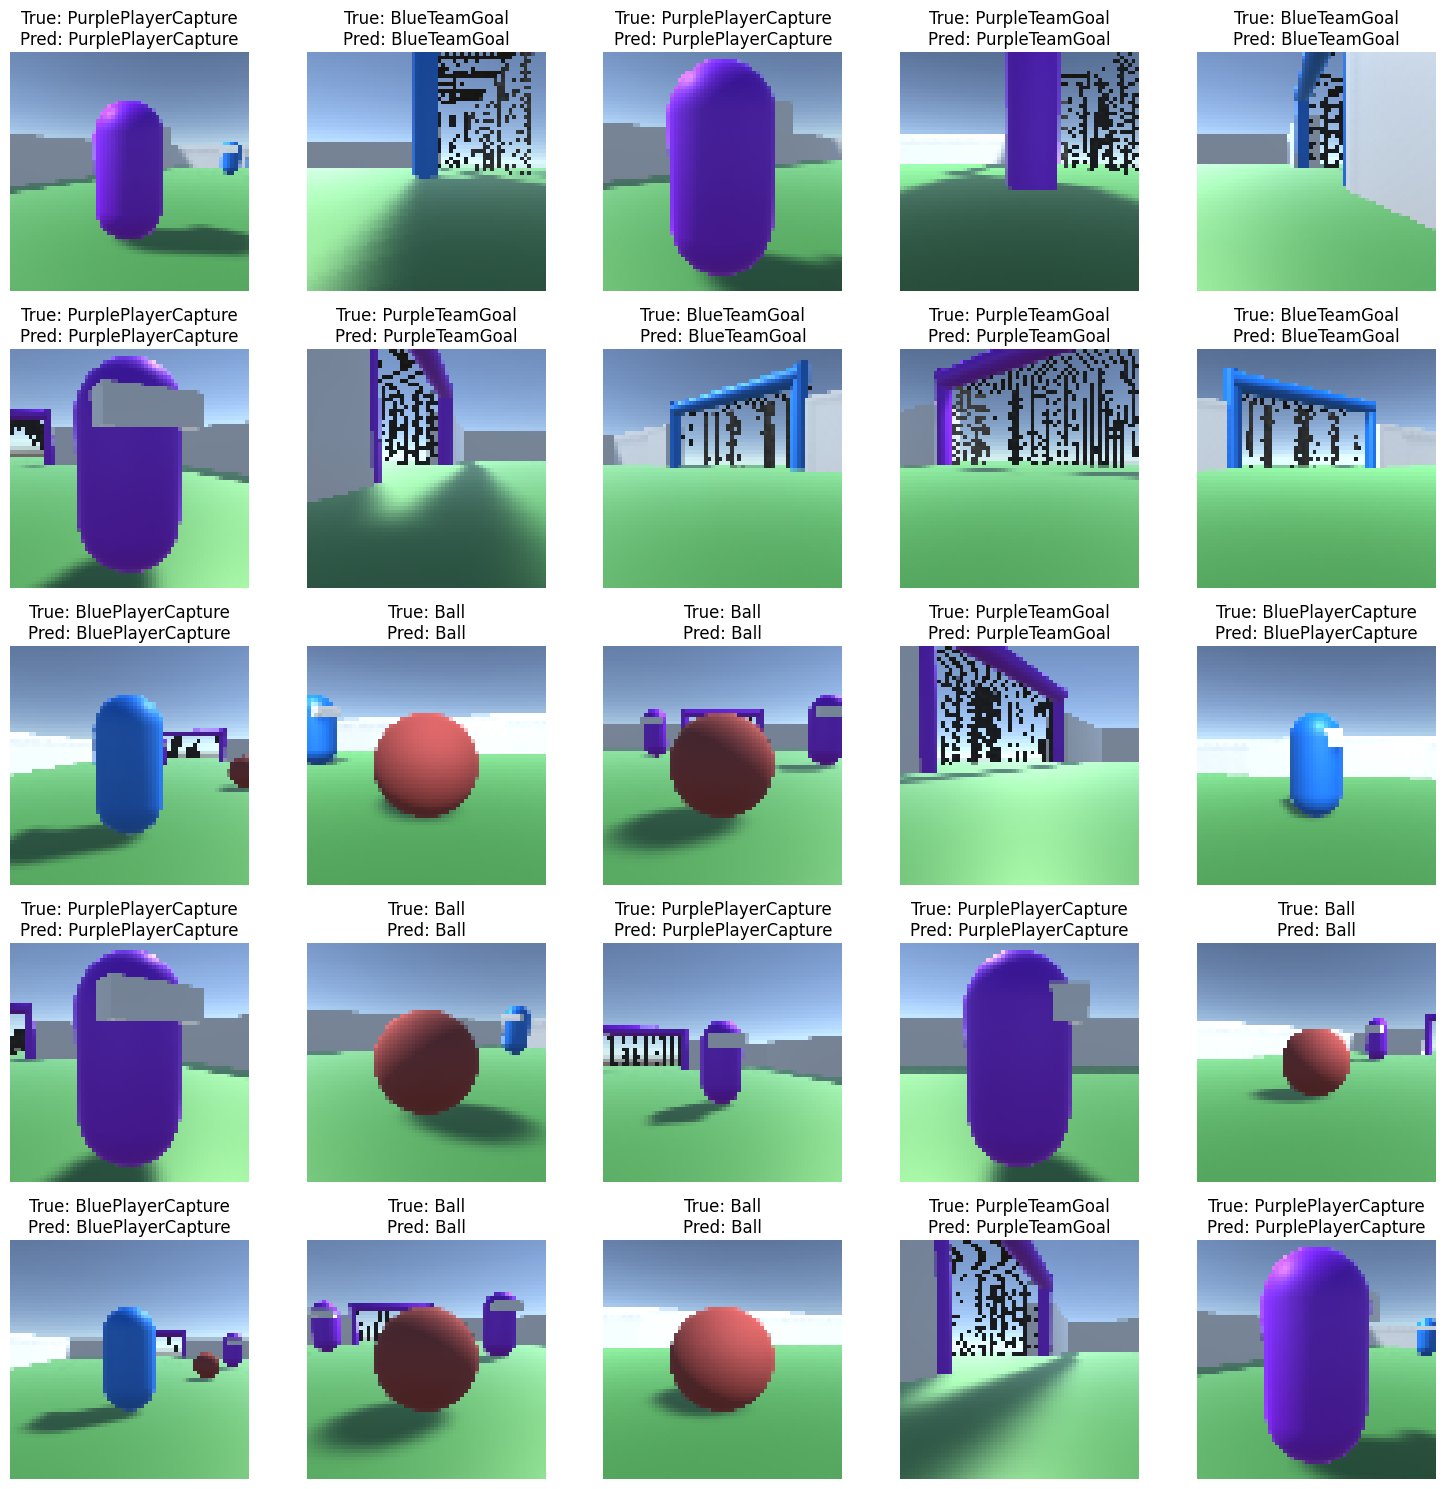

In [23]:
test_labels = test_generator.classes

# Predict the probabilities on the test data
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_classes)

print(cm)

# Plot the confusion matrix
plot_confusion_matrix(cm, test_generator)

# Plotting a batch of images with their true and predicted labels
plot_images_with_predictions(test_generator, model)

Increasing epochs to 60 -  as previous model shows signs of potentially benefitting from more epochs

In [24]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    # Add more layers as needed
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
trained_model_inc_epochs = model.fit(train_generator,validation_data = test_generator, epochs=60)

C:\Users\Søren Merved\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.2744 - loss: 1.5784 - val_accuracy: 0.5926 - val_loss: 1.2995
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.6276 - loss: 1.3102 - val_accuracy: 0.6458 - val_loss: 0.9407
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.7241 - loss: 0.9953 - val_accuracy: 0.9537 - val_loss: 0.5874
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.7947 - loss: 0.7408 - val_accuracy: 0.9259 - val_loss: 0.4614
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.8164 - loss: 0.6209 - val_accuracy: 0.9421 - val_loss: 0.3299
Epoch 6/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.8461 - loss: 0.4954 - val_accuracy: 0.9398 - val_loss: 0.2626
Epoch 7/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.8831 - loss: 0.4258 - val_accuracy: 0.9653 - val_loss: 0.2149
Epoch 8/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.9358 - loss: 0.3173 - val_accuracy: 0.

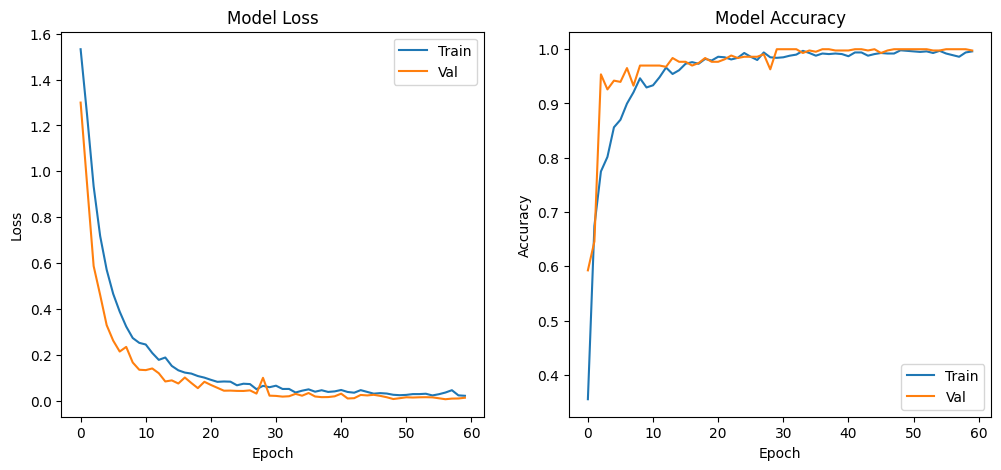

In [25]:
plot_model_metrics(trained_model_inc_epochs)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
[[89  0  0  0  0]
 [ 0 90  0  0  0]
 [ 0  0 74  0  1]
 [ 0  0  0 81  0]
 [ 0  0  0  0 97]]


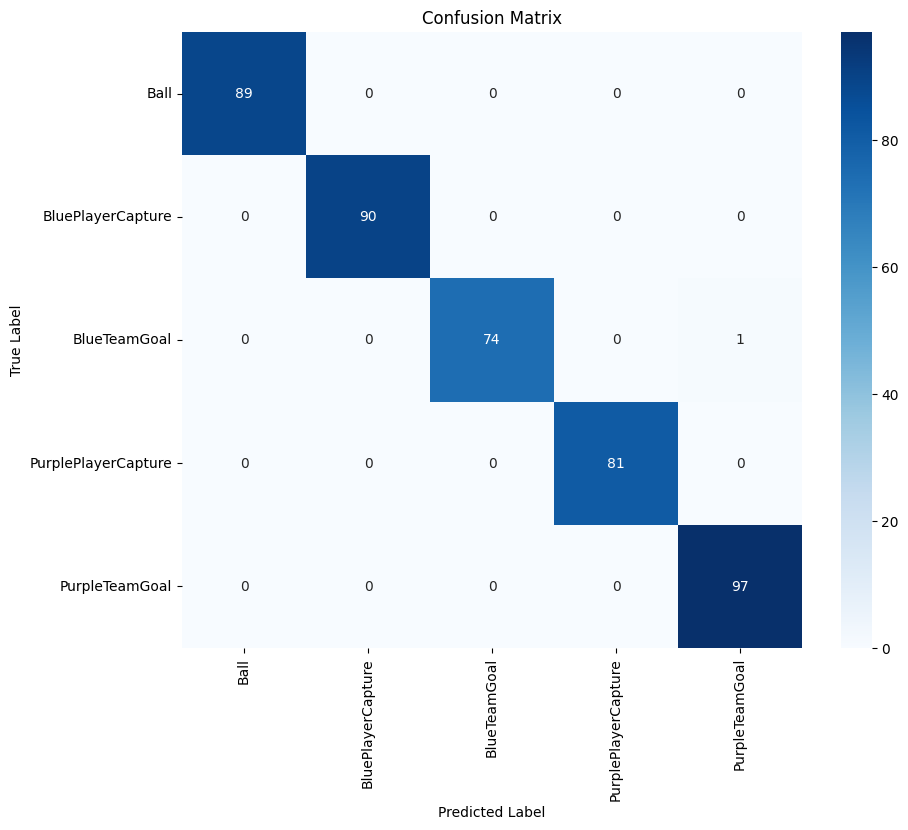

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


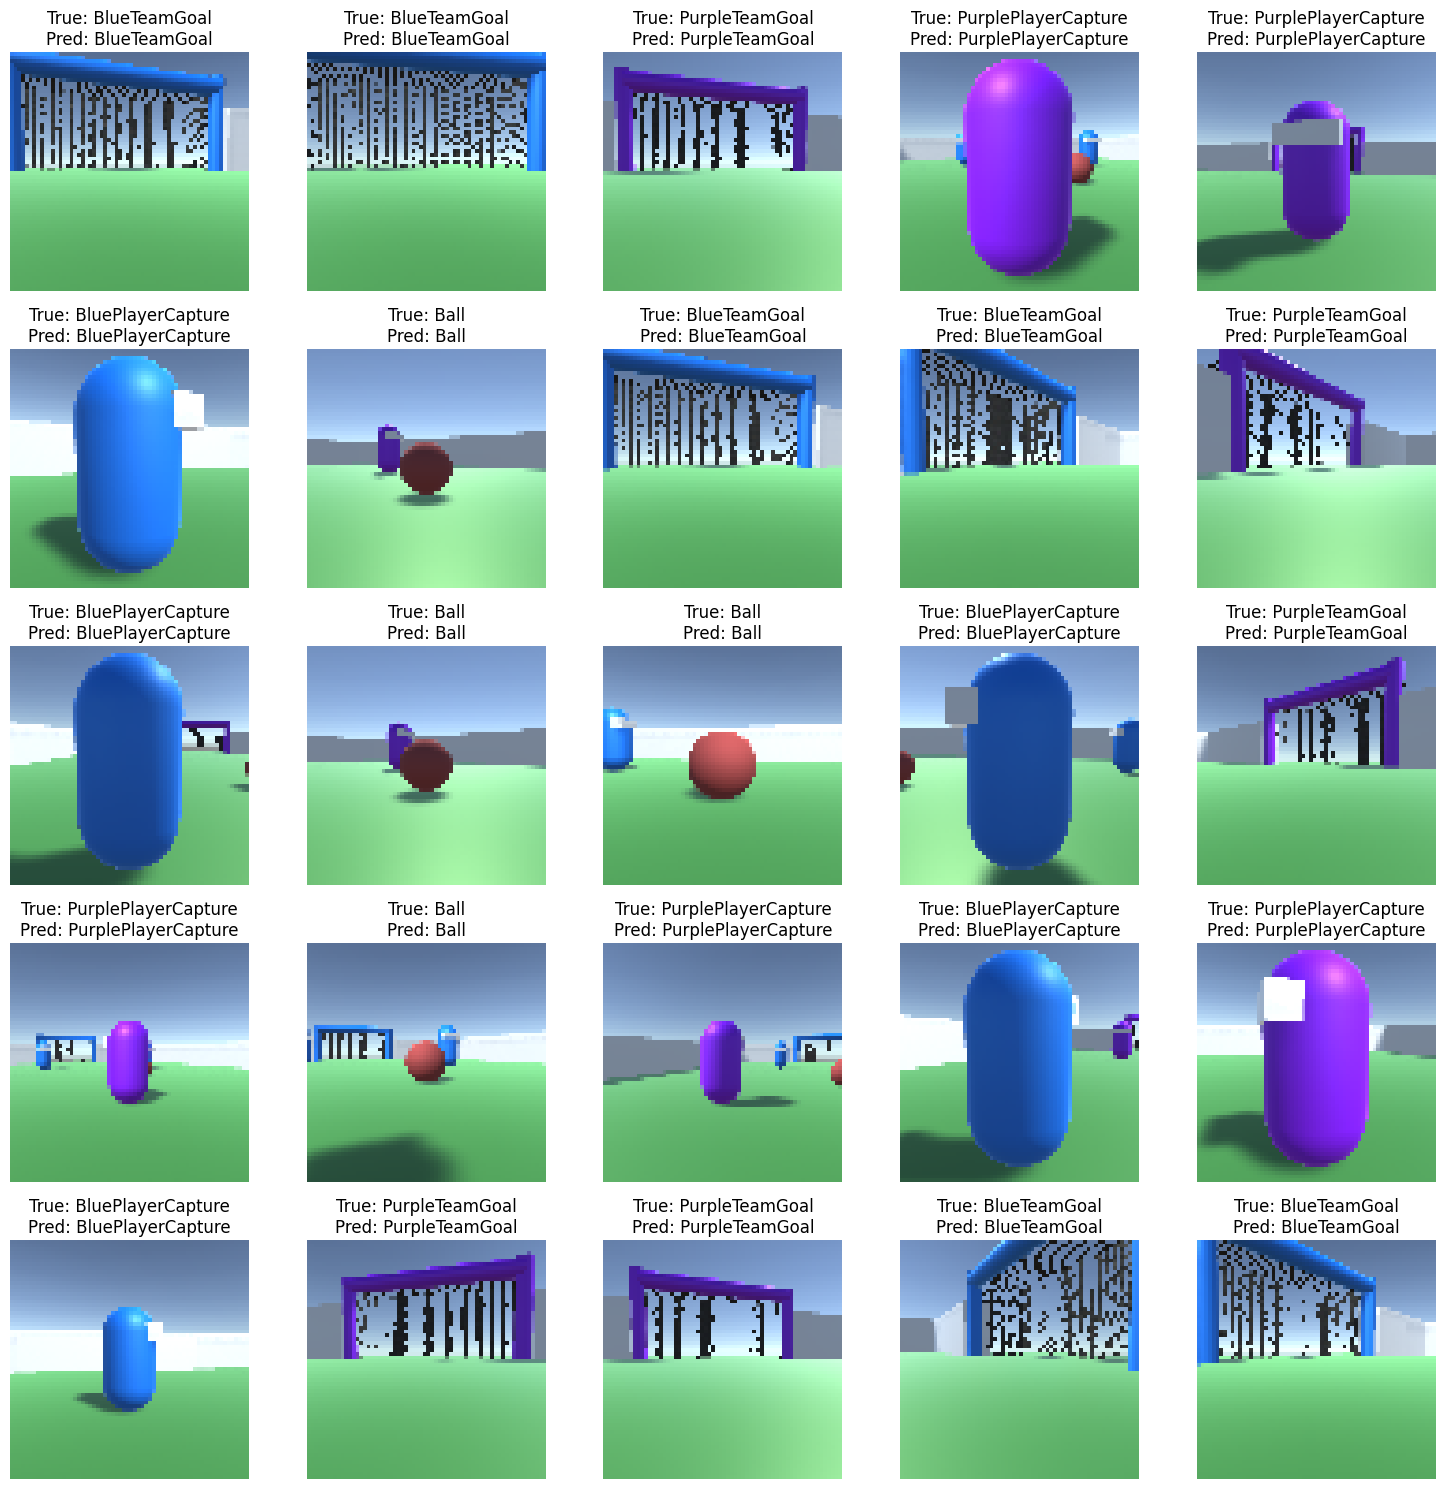

In [26]:
test_labels = test_generator.classes

# Predict the probabilities on the test data
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_classes)

print(cm)

# Plot the confusion matrix
plot_confusion_matrix(cm, test_generator)

# Plotting a batch of images with their true and predicted labels
plot_images_with_predictions(test_generator, model)